# In this notebook, we discuss autonomous equations of the form

$dy/dt=f(y)$.

The functions $f$ do not explicitly depend on $t$, and we look at the behaviours of the solutions by studying $f(y)$.

In [2]:
## import packages
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols, sqrt, Abs, solve, Symbol
from scipy import *
from scipy import integrate
from scipy.integrate import ode
from sympy.plotting import plot

## Recall the logistic equation from Week1 lab:

## Population Models: Logistic Model
$\frac{dP}{dt}=0.06P-0.0004P^2$

Setting the right hand side to zero, we get two equilibrium solutions: $y(t)=0$, and $y(t)=150$.

Solving by hand, the family of solutions are
$y(t)=\frac{150P_0}{P_0 + (150 - P_0)exp(-0.06t)}$
where we already replaced all unknown constants $C$ with $P_0$.


### We can graph its solution curves, given a list of various initial conditions $P_0$.


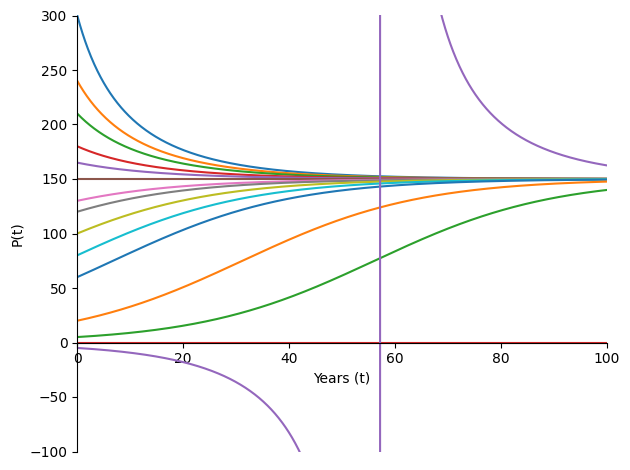

In [3]:
t = symbols('t') # time in years
P_0 = symbols('P_0') # Unknown constants to be determined

# various initial conditions, P_0; will use to find C
P_0_list = [300, 240, 210, 180, 165, 150, 130, 120, 100, 80, 60, 20, 5, 0, -5]

# solved solution by hand
solution = 150 * P_0 / (P_0 + (150 - P_0) * sym.exp(-0.06*t))

plot_general = plot(solution.subs(P_0, P_0_list[0]), (t, 0, 100), xlim=[0, 100], ylim=[-100,300], ylabel='P(t)', xlabel='Years (t)',show=False, axis_center=(0,0))
for i in range(1, len(P_0_list)):
  plot_general.append(plot(solution.subs(P_0, P_0_list[i]), (t, 0, 100), show=False)[0])
plot_general.show()

### Question: What do you observe in the solutions from the various intial conditions? What happens when the initial condition is lower than 0?

Ans:

## Example: Consider the equation

$dy/dt = y(y-1)$

Set right hand side equal to zero, we get the equlibrium solutions $y=0,\ y=1$.

In [4]:
# We defind our symbol t and function y using
t = symbols('t')
y = Function('y')(t)
# We can also use the bottom to define a function y(t) as well.
# y = symbols('y', cls=Function)(t)

dydt = y.diff(t) # this gives us dy/dt

eq = Eq(dydt, y * (y-1)) # dy/dt

solution = dsolve(eq,y) # we solve the autonomous equation with dsolve()

In [5]:
solution
print(solution)

Eq(y(t), C1/(C1 - exp(t)))


### Test to solve the initial condition $C_1$ by plugging in $t=0$ and $y(0)=150$

Eq(150/(149*(150/149 - exp(t))), 150)


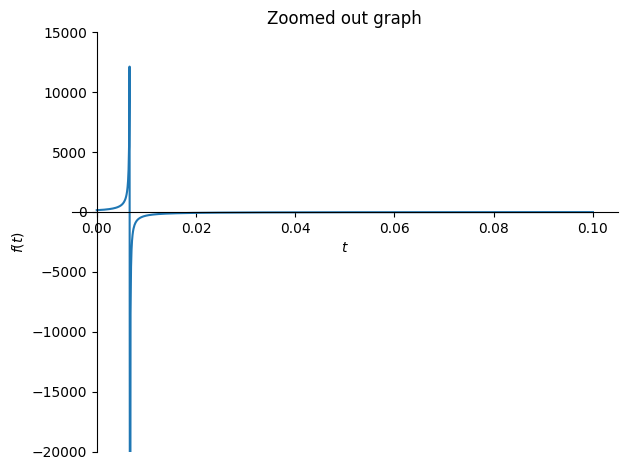

In [6]:
# Notice, the output of solution contains a C1 so we define a variable for this.
C1 = symbols('C1')
# For the initial condition we set the rhs side when t = 0 C1 / (C1 - e^t) -> C1 / (C1 - 1) to 150
init_condition = Eq(solution.rhs.subs(t, 0), 150)
# we solve for C1.
C1_ic = solve(init_condition, C1)[0]
C1_ic # C1 = 150/149
# We plug in value of C1 (C1_ic) back into the solution
equation = Eq(solution.rhs.subs({C1:C1_ic}), 150)
# we then plot it
print(equation)
plot(equation.lhs, (t,0,0.1), ylim = (-20000, 15000), title="Zoomed out graph") # zoom out

## Zoomed in to see blow up near 0.006

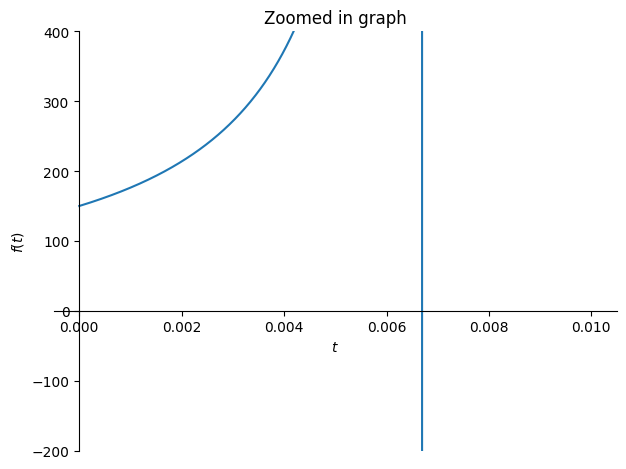

In [7]:
plot(equation.lhs,  (t,0,0.01), ylim = (-200, 400), title="Zoomed in graph") # zoom in